In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# loading the dataset to a Pandas DataFrame
wine_dataset = pd.read_csv('winequality-red.csv')

In [4]:
# Separate features and target variable
X = wine_dataset.drop(columns=['quality'])  # Features
y = wine_dataset['quality']  # Target variable

In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

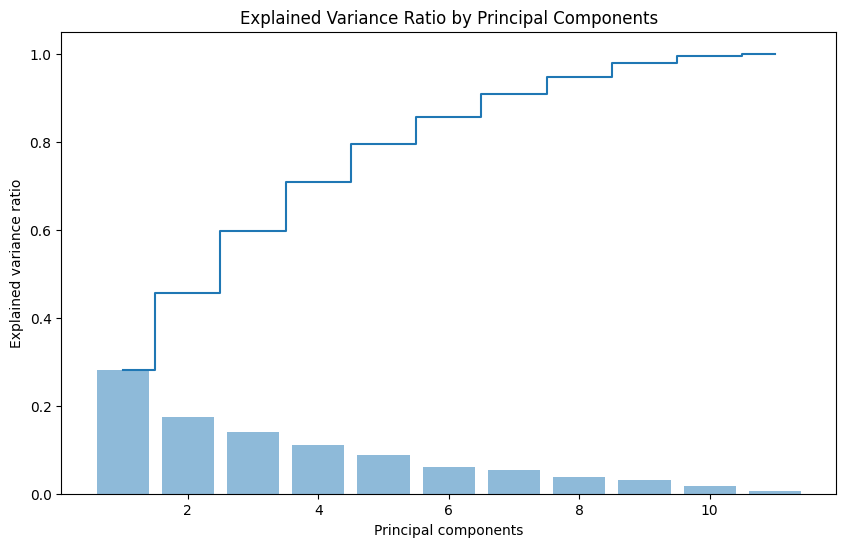

In [8]:
import numpy as np
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

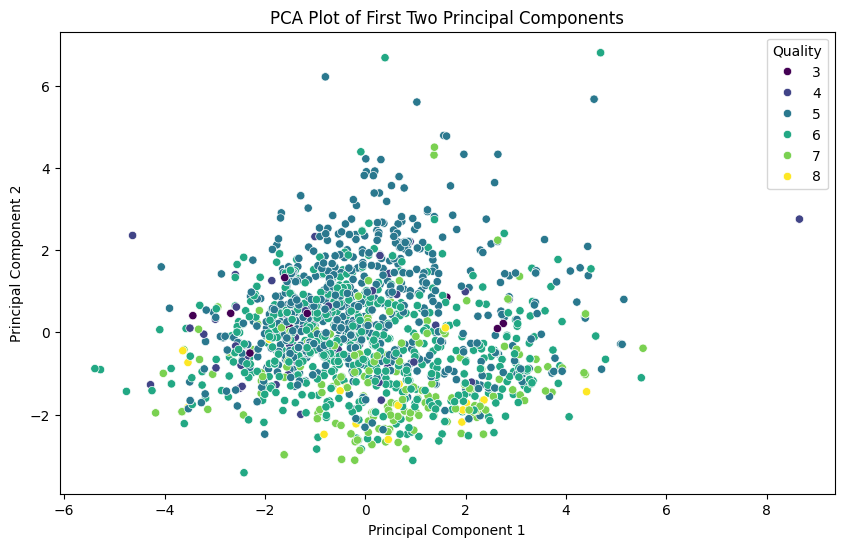

In [9]:
# Scatter plot of first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of First Two Principal Components')
plt.legend(title='Quality')
plt.show()

# # Visualize Results
# plt.figure(figsize=(8, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.8)
# plt.title('PCA of Wine Quality Dataset')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.colorbar(label='Quality')
# plt.grid(True)
# plt.show()

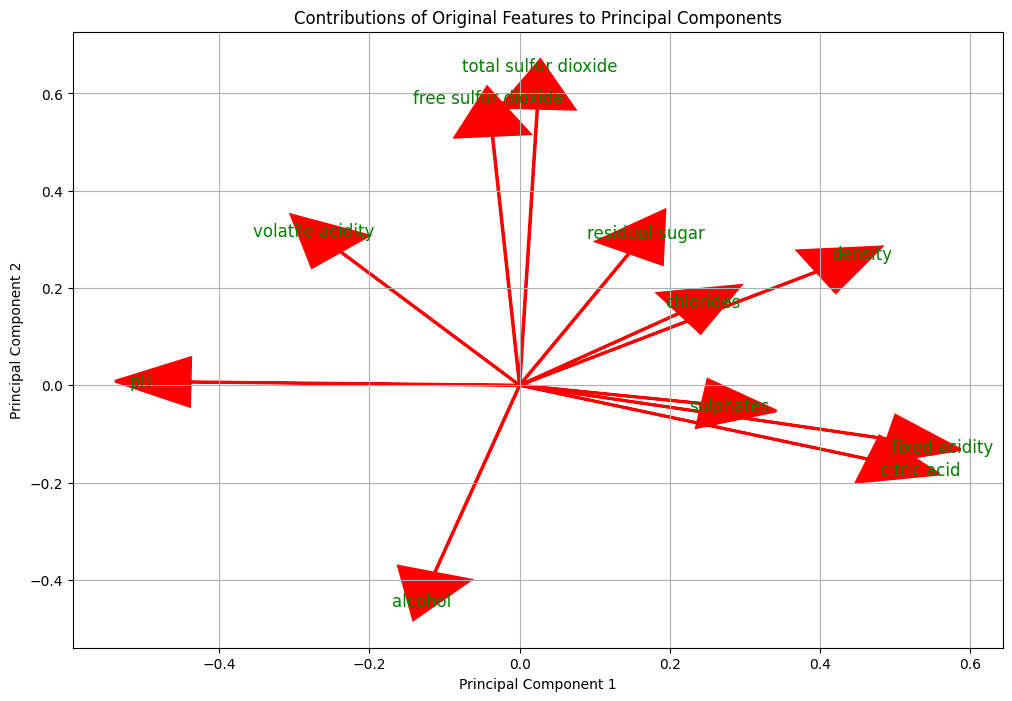

In [10]:
import numpy as np

# Plot the contributions of original features to the first two principal components
plt.figure(figsize=(12, 8))
for i in range(len(pca.components_)):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], head_width=0.1, head_length=0.1, linewidth=2, color='r')
    plt.text(pca.components_[0, i]*1.15, pca.components_[1, i]*1.15, X.columns[i], color='g', ha='center', va='center', fontsize=12)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Contributions of Original Features to Principal Components')
plt.grid()
plt.show()

In [11]:
# Print contributions of original features to principal components
components = pca.components_
original_feature_names = X.columns

for i, component in enumerate(components):
    print(f"Principal Component {i + 1}:")
    for j, contribution in enumerate(component):
        print(f"    Feature: {original_feature_names[j]}, Contribution: {contribution}")

Principal Component 1:
    Feature: fixed acidity, Contribution: 0.489314215196989
    Feature: volatile acidity, Contribution: -0.23858436259729643
    Feature: citric acid, Contribution: 0.4636316563349594
    Feature: residual sugar, Contribution: 0.1461071535855693
    Feature: chlorides, Contribution: 0.21224658194703155
    Feature: free sulfur dioxide, Contribution: -0.03615752441040837
    Feature: total sulfur dioxide, Contribution: 0.023574853564112763
    Feature: density, Contribution: 0.39535300876845547
    Feature: pH, Contribution: -0.43851962406531036
    Feature: sulphates, Contribution: 0.2429213309479712
    Feature: alcohol, Contribution: -0.11323206499477226
Principal Component 2:
    Feature: fixed acidity, Contribution: -0.11050273795859271
    Feature: volatile acidity, Contribution: 0.27493048046507607
    Feature: citric acid, Contribution: -0.15179135552456027
    Feature: residual sugar, Contribution: 0.272080238471788
    Feature: chlorides, Contribution: 

K-Means Clustering

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

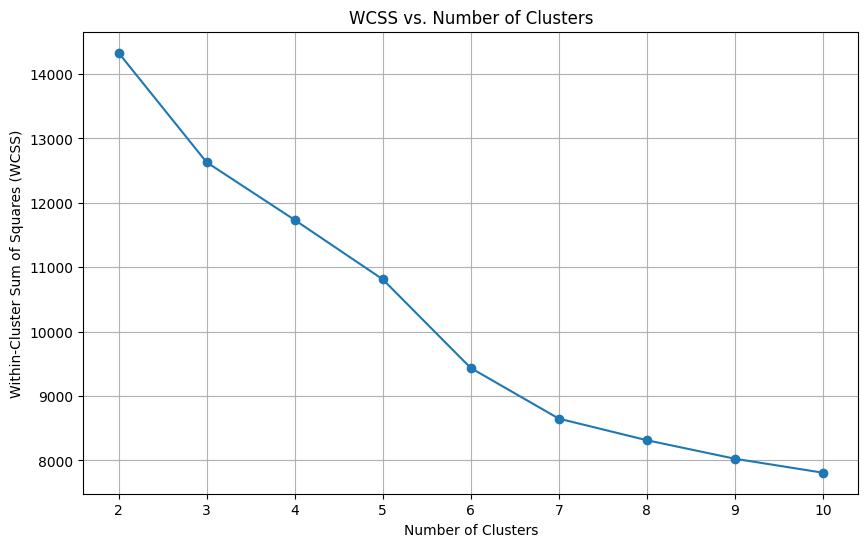

In [13]:
import matplotlib.pyplot as plt

# Assuming X_pca is your PCA-transformed dataset

# Define the range of clusters you want to test
min_clusters = 2
max_clusters = 10
wcss_values = []

# Calculate WCSS for different numbers of clusters
for i in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    wcss_values.append(kmeans.inertia_)

# Plot the WCSS values
plt.figure(figsize=(10, 6))
plt.plot(range(min_clusters, max_clusters + 1), wcss_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('WCSS vs. Number of Clusters')
plt.xticks(range(min_clusters, max_clusters + 1))
plt.grid(True)
plt.show()


In [22]:
# Define the number of clusters
num_clusters = 6

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_pca)

# Get the cluster labels
cluster_labels = kmeans.labels_

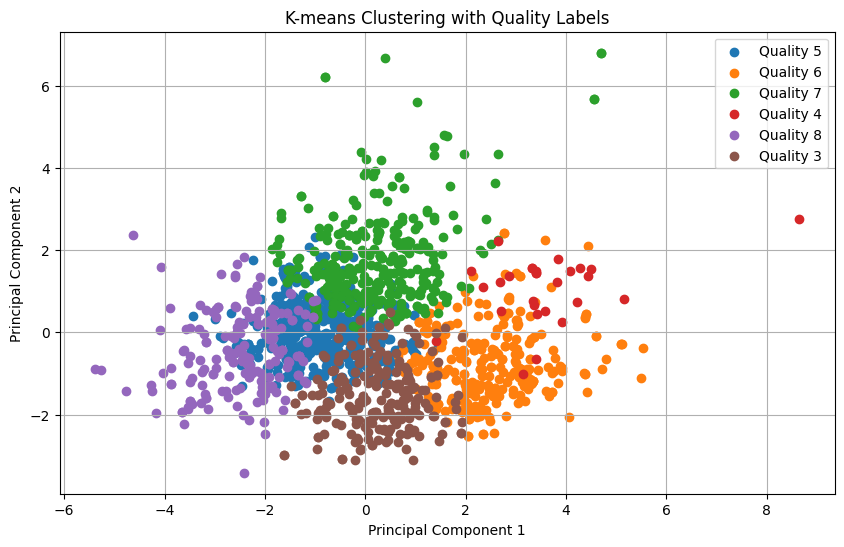

In [23]:
# Map cluster labels to quality values
quality_values = wine_dataset['quality'].unique()
cluster_mapping = {}
for cluster_label in range(num_clusters):
    cluster_quality = quality_values[cluster_label]
    cluster_mapping[cluster_label] = cluster_quality

# Plotting the clusters with cluster labels
plt.figure(figsize=(10, 6))
for cluster_label in range(num_clusters):
    cluster_quality = cluster_mapping[cluster_label]
    plt.scatter(X_pca[cluster_labels == cluster_label, 0], X_pca[cluster_labels == cluster_label, 1], label=f'Quality {cluster_quality}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with Quality Labels')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Performance metrics
silhouette = silhouette_score(X_pca, cluster_labels)
davies_bouldin = davies_bouldin_score(X_pca, cluster_labels)
calinski_harabasz = calinski_harabasz_score(X_pca, cluster_labels)

print("Performance Metrics:")
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

Performance Metrics:
Silhouette Score: 0.18081259098539512
Davies-Bouldin Index: 1.4588688805969952
Calinski-Harabasz Index: 275.35686820608527


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import scipy.cluster.hierarchy as sch

# Assuming X_pca is your PCA-transformed dataset

# Define the number of clusters
num_clusters = 6

# Perform hierarchical clustering
hc = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
cluster_labels = hc.fit_predict(X_pca)

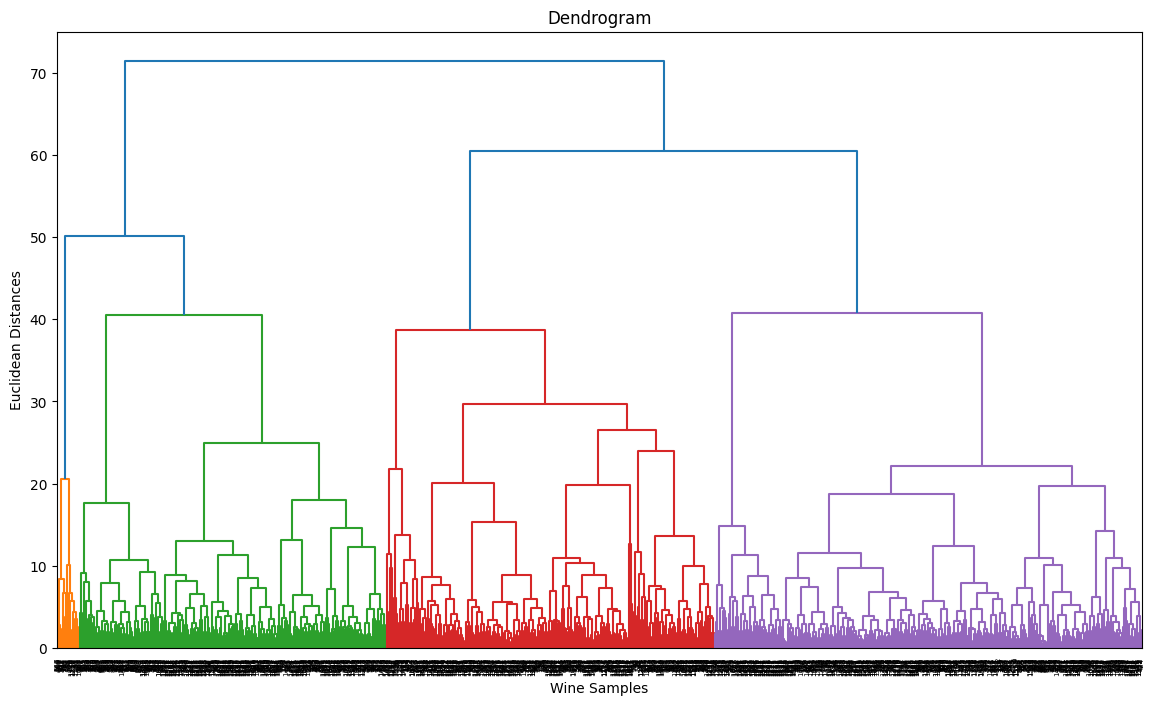

In [30]:
# Plotting the dendrogram
plt.figure(figsize=(14, 8))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wine Samples')
plt.ylabel('Euclidean Distances')
plt.show()

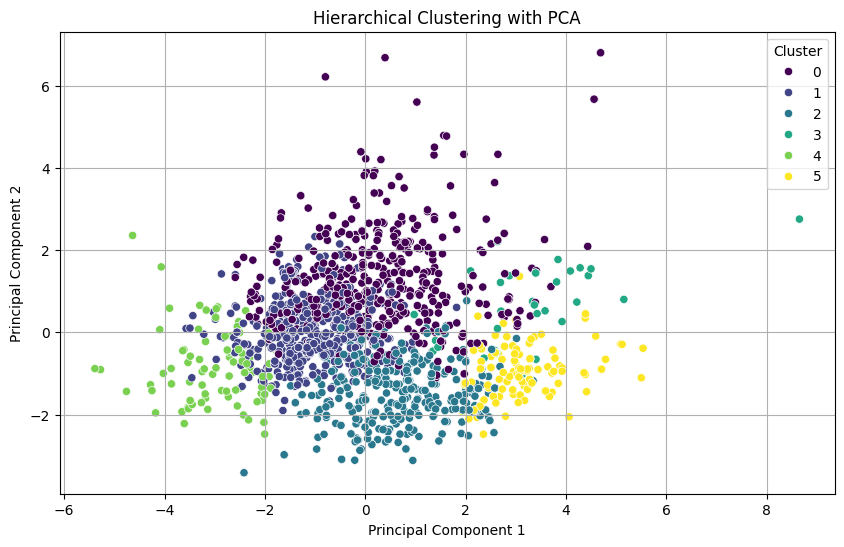

In [31]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', legend='full')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hierarchical Clustering with PCA')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [32]:
# Performance metrics
silhouette = silhouette_score(X_pca, cluster_labels)
davies_bouldin = davies_bouldin_score(X_pca, cluster_labels)
calinski_harabasz = calinski_harabasz_score(X_pca, cluster_labels)

print("Performance Metrics:")
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

Performance Metrics:
Silhouette Score: 0.14950267249528948
Davies-Bouldin Index: 1.5263127502658618
Calinski-Harabasz Index: 225.77101623423596


Spectral Clustering

In [33]:
from sklearn.cluster import SpectralClustering

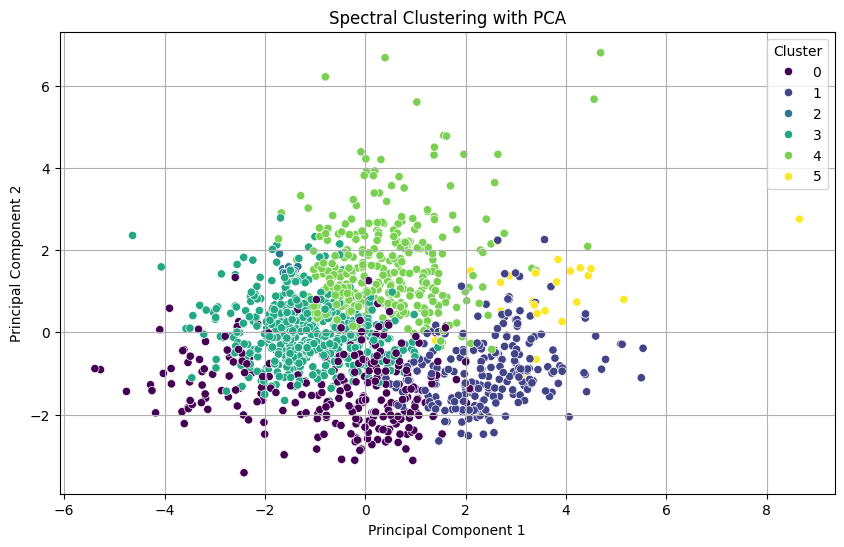

In [34]:
# Perform spectral clustering
sc = SpectralClustering(n_clusters=num_clusters, affinity='nearest_neighbors', random_state=42)
cluster_labels = sc.fit_predict(X_pca)

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', legend='full')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Spectral Clustering with PCA')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [35]:
# Performance metrics
silhouette = silhouette_score(X_pca, cluster_labels)
davies_bouldin = davies_bouldin_score(X_pca, cluster_labels)
calinski_harabasz = calinski_harabasz_score(X_pca, cluster_labels)

print("Performance Metrics:")
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

Performance Metrics:
Silhouette Score: 0.0598224292979059
Davies-Bouldin Index: 1.4777288096512606
Calinski-Harabasz Index: 217.0398800273586


Differential privacy

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [37]:
# Generate synthetic dataset
X, _ = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=42)

In [38]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [40]:
# Add noise to the PCA-transformed data for differential privacy
epsilon = 1.0  # Privacy parameter
privacy_noise = np.random.normal(loc=0.0, scale=epsilon, size=X_pca.shape)
X_pca_private = X_pca + privacy_noise


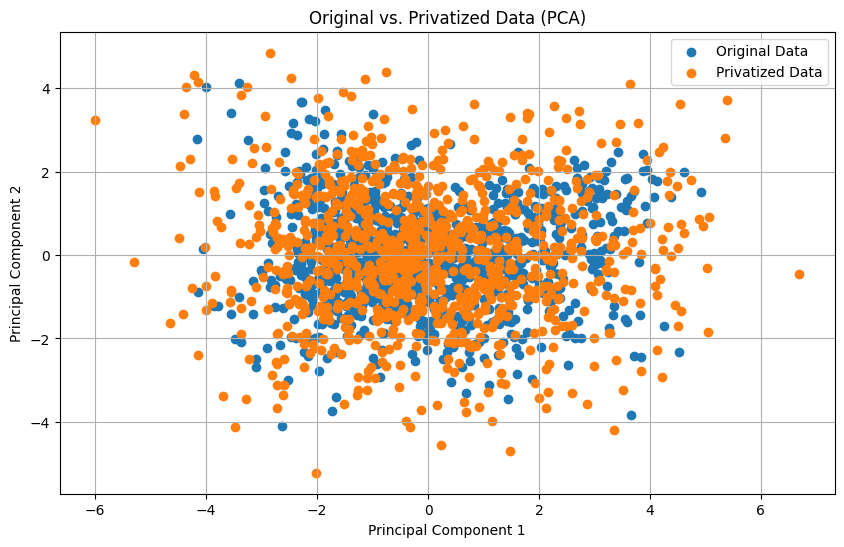

In [41]:
# Plot original vs. preserved data
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], label='Original Data')
plt.scatter(X_pca_private[:, 0], X_pca_private[:, 1], label='Privatized Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Original vs. Privatized Data (PCA)')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
# Measure accuracy of privacy preservation
accuracy = np.mean(np.abs(X_pca - X_pca_private))
print("Accuracy Measure (Mean Absolute Error):", accuracy)

Accuracy Measure (Mean Absolute Error): 0.8040905243612876


In [45]:
# Apply K-means clustering on the preserved data
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels_private = kmeans.fit_predict(X_pca_private)


In [46]:
# Map cluster labels to wine quality values
quality_values = [3, 4, 5, 6, 7, 8]
cluster_mapping = {i: quality_values[i] for i in range(num_clusters)}
cluster_labels_mapped = np.array([cluster_mapping[label] for label in cluster_labels_private])


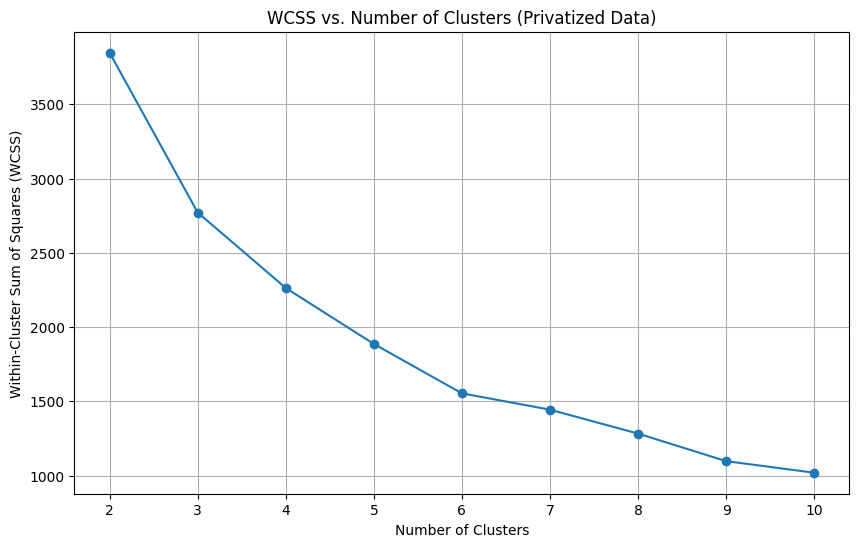

In [49]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming X_pca_private is your PCA-transformed and differentially private data

# Define the range of clusters you want to test
min_clusters = 2
max_clusters = 10
wcss_values_private = []

# Calculate WCSS for different numbers of clusters
for i in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca_private)
    wcss_values_private.append(kmeans.inertia_)

# Plot the WCSS values
plt.figure(figsize=(10, 6))
plt.plot(range(min_clusters, max_clusters + 1), wcss_values_private, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('WCSS vs. Number of Clusters (Privatized Data)')
plt.xticks(range(min_clusters, max_clusters + 1))
plt.grid(True)
plt.show()


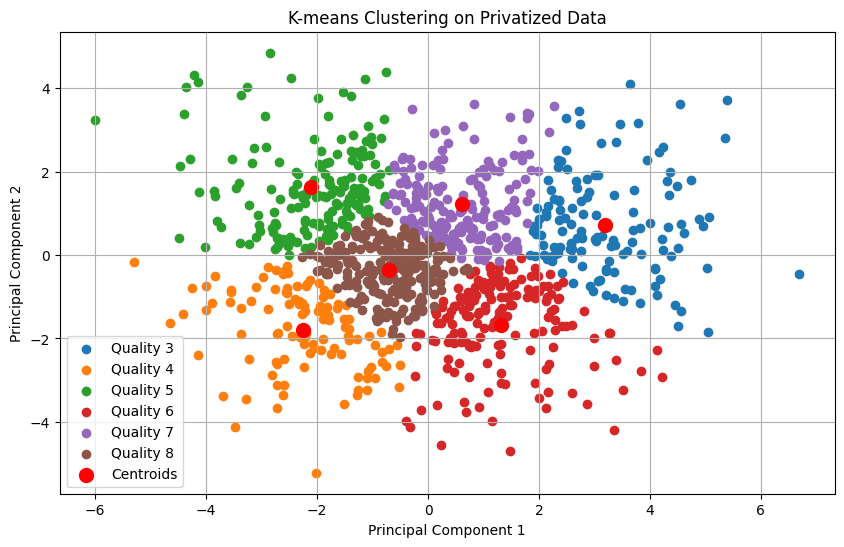

In [47]:
# Calculate Within-Cluster Sum of Squares (WCSS)
wcss_private = kmeans.inertia_

# Plot K-means clustering results
plt.figure(figsize=(10, 6))
for cluster_label in range(num_clusters):
    plt.scatter(X_pca_private[cluster_labels_private == cluster_label, 0], X_pca_private[cluster_labels_private == cluster_label, 1], label=f'Quality {cluster_mapping[cluster_label]}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on Privatized Data')
plt.legend()
plt.grid(True)
plt.show()


In [48]:
# Performance metrics
silhouette_private = silhouette_score(X_pca_private, cluster_labels_private)
davies_bouldin_private = davies_bouldin_score(X_pca_private, cluster_labels_private)
calinski_harabasz_private = calinski_harabasz_score(X_pca_private, cluster_labels_private)

print("Performance Metrics on Privatized Data:")
print("Silhouette Score:", silhouette_private)
print("Davies-Bouldin Index:", davies_bouldin_private)
print("Calinski-Harabasz Index:", calinski_harabasz_private)
print("Within-Cluster Sum of Squares (WCSS):", wcss_private)

Performance Metrics on Privatized Data:
Silhouette Score: 0.3209404178651176
Davies-Bouldin Index: 0.8891269269853547
Calinski-Harabasz Index: 616.2626480352404
Within-Cluster Sum of Squares (WCSS): 1553.8217302595585


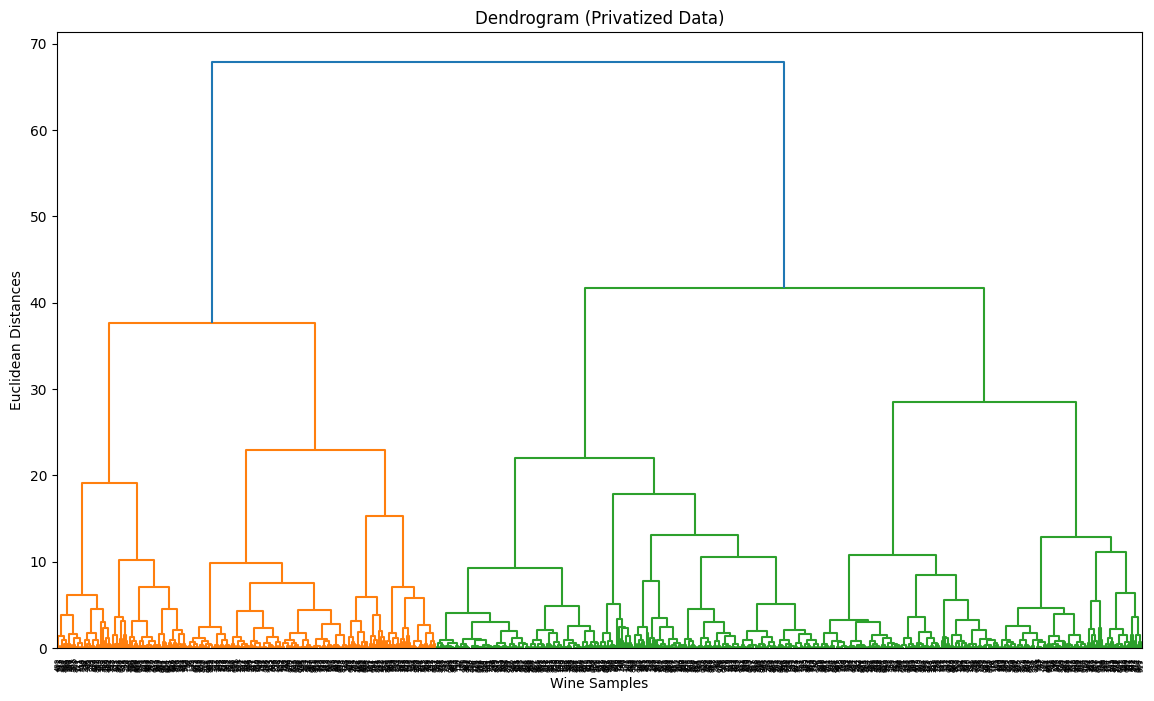

In [51]:
# Plotting the dendrogram
plt.figure(figsize=(14, 8))
dendrogram = sch.dendrogram(sch.linkage(X_pca_private, method='ward'))
plt.title('Dendrogram (Privatized Data)')
plt.xlabel('Wine Samples')
plt.ylabel('Euclidean Distances')
plt.show()

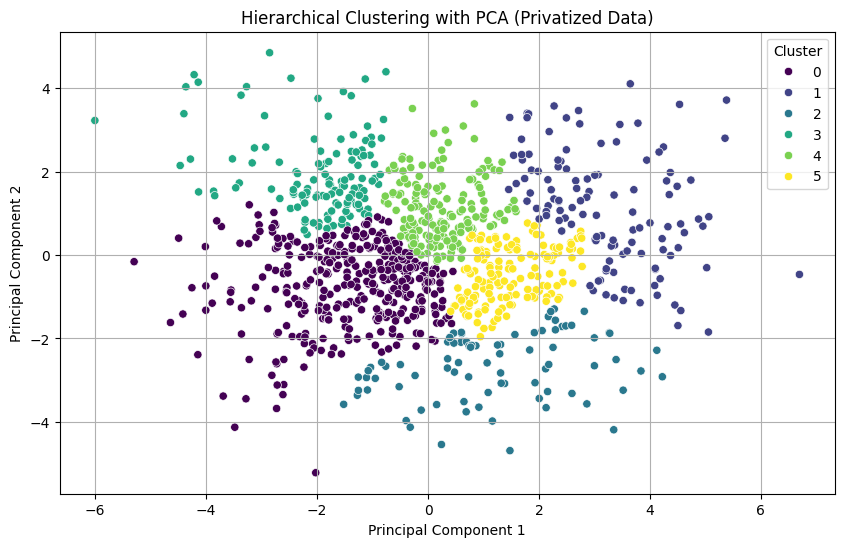

In [50]:
# Perform hierarchical clustering
hc = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
cluster_labels_private = hc.fit_predict(X_pca_private)

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_private[:, 0], y=X_pca_private[:, 1], hue=cluster_labels_private, palette='viridis', legend='full')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hierarchical Clustering with PCA (Privatized Data)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [52]:
# Performance metrics
silhouette_private = silhouette_score(X_pca_private, cluster_labels_private)
davies_bouldin_private = davies_bouldin_score(X_pca_private, cluster_labels_private)
calinski_harabasz_private = calinski_harabasz_score(X_pca_private, cluster_labels_private)

print("Performance Metrics on Hierarchical Clustering (Privatized Data):")
print("Silhouette Score:", silhouette_private)
print("Davies-Bouldin Index:", davies_bouldin_private)
print("Calinski-Harabasz Index:", calinski_harabasz_private)

Performance Metrics on Hierarchical Clustering (Privatized Data):
Silhouette Score: 0.26694335264063074
Davies-Bouldin Index: 0.9501483054104195
Calinski-Harabasz Index: 497.75411739182465


spectral clustering

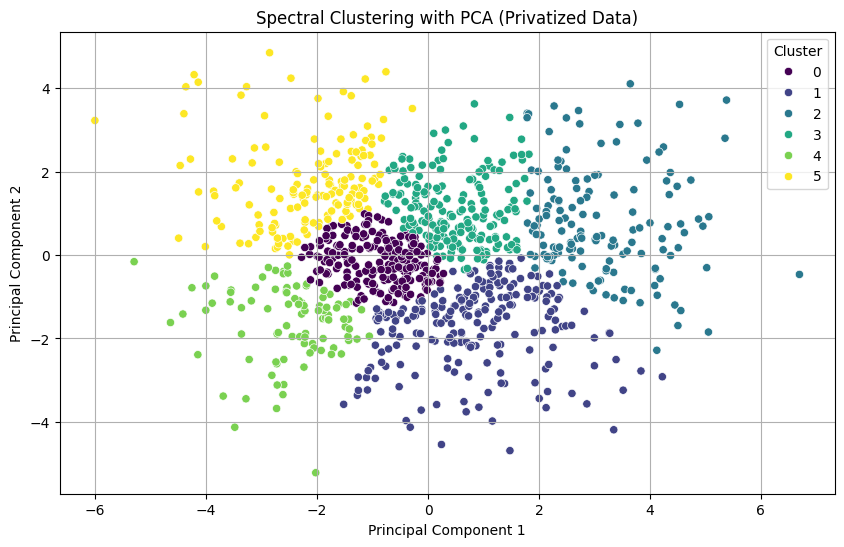

In [53]:
# Perform spectral clustering
sc = SpectralClustering(n_clusters=num_clusters, affinity='nearest_neighbors', random_state=42)
cluster_labels_private = sc.fit_predict(X_pca_private)

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_private[:, 0], y=X_pca_private[:, 1], hue=cluster_labels_private, palette='viridis', legend='full')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Spectral Clustering with PCA (Privatized Data)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [54]:
# Performance metrics
silhouette_private = silhouette_score(X_pca_private, cluster_labels_private)
davies_bouldin_private = davies_bouldin_score(X_pca_private, cluster_labels_private)
calinski_harabasz_private = calinski_harabasz_score(X_pca_private, cluster_labels_private)

print("Performance Metrics on Spectral Clustering (Privatized Data):")
print("Silhouette Score:", silhouette_private)
print("Davies-Bouldin Index:", davies_bouldin_private)
print("Calinski-Harabasz Index:", calinski_harabasz_private)

Performance Metrics on Spectral Clustering (Privatized Data):
Silhouette Score: 0.2968049198054856
Davies-Bouldin Index: 0.883110298426597
Calinski-Harabasz Index: 574.0605234008303
